In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv("./loan_train.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
features = ['Gender', 'Married', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

target = ['Loan_Status']

In [5]:
features_LE = ['Gender', 'Married', 'Education','Self_Employed', 'Property_Area']
Labelencoders = []
for i in features_LE:
    le = LabelEncoder()
    data[i] = le.fit_transform(data[i])
    Labelencoders.append(le)

In [6]:
useful_data = data[features + target.copy()]
useful_data.dropna(inplace=True)
useful_data.head()

C:\Users\Paolo\AppData\Local\Temp\ipykernel_9408\3041460468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_data.dropna(inplace=True)


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y
5,1,1,0,1,5417,4196.0,267.0,360.0,1.0,2,Y


In [7]:
useful_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529 entries, 1 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             529 non-null    int32  
 1   Married            529 non-null    int32  
 2   Education          529 non-null    int32  
 3   Self_Employed      529 non-null    int32  
 4   ApplicantIncome    529 non-null    int64  
 5   CoapplicantIncome  529 non-null    float64
 6   LoanAmount         529 non-null    float64
 7   Loan_Amount_Term   529 non-null    float64
 8   Credit_History     529 non-null    float64
 9   Property_Area      529 non-null    int32  
 10  Loan_Status        529 non-null    object 
dtypes: float64(4), int32(5), int64(1), object(1)
memory usage: 39.3+ KB


In [8]:
X = useful_data[features].to_numpy()
y = useful_data[target].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Alberi decisionali e random forest non richiedono dati normalizzati

In [9]:
score_training = []
score_test = []
max_depth = []
for i in range(1, 20):
    albero = DecisionTreeClassifier(max_depth=i)
    albero.fit(X_train, y_train)
    score_training.append(albero.score(X_train, y_train))
    score_test.append(albero.score(X_test, y_test))
    max_depth.append(i)

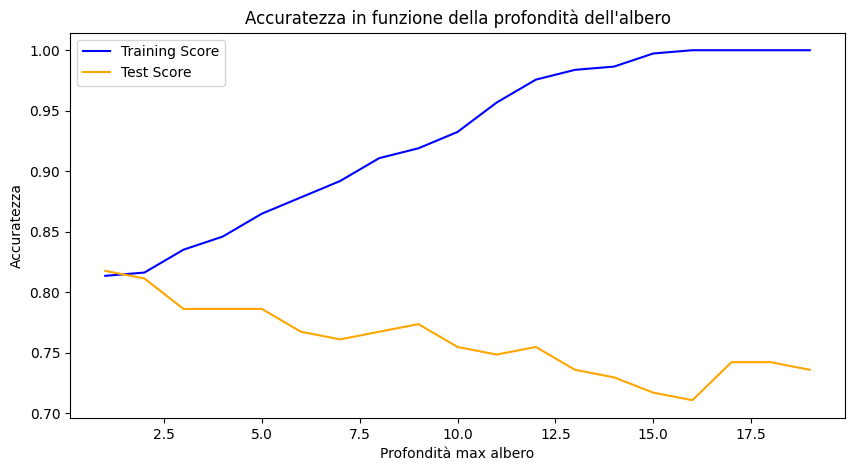

In [10]:
fig,ax = plt.subplots(figsize=(10, 5))
ax.plot(max_depth, score_training, label='Training Score', color='blue')
ax.plot(max_depth, score_test, label='Test Score', color='orange')
ax.set_xlabel('Profondità max albero')
ax.set_ylabel('Accuratezza')
ax.set_title('Accuratezza in funzione della profondità dell\'albero')
ax.legend()
plt.show()

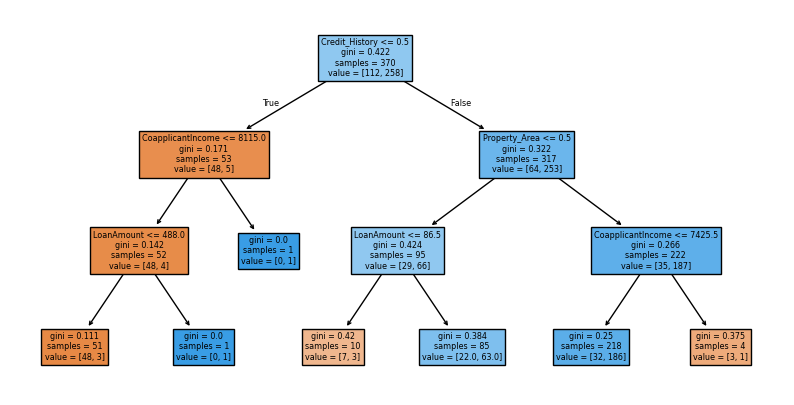

In [11]:
albero = DecisionTreeClassifier(max_depth=3)
albero.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(10, 5))
plot_tree(albero, ax=ax, feature_names=features, filled=True)
plt.show()

### Random forest

In [12]:
rf = RandomForestClassifier(max_depth=3, n_estimators=200)
rf.fit(X_train, y_train.ravel())

RandomForestClassifier(max_depth=3, n_estimators=200)

In [13]:
rf.score(X_test, y_test)

0.8176100628930818

In [14]:
rf.score(X_train, y_train)

0.8162162162162162

In [15]:
rf.feature_importances_

array([0.01757917, 0.01223913, 0.0070847 , 0.00562843, 0.08489559,
       0.08112535, 0.08555834, 0.06337756, 0.57608787, 0.06642386])

In [16]:
for feature, importance in zip(features, rf.feature_importances_):
    print(f"{feature}: {importance:.4f}")

Gender: 0.0176
Married: 0.0122
Education: 0.0071
Self_Employed: 0.0056
ApplicantIncome: 0.0849
CoapplicantIncome: 0.0811
LoanAmount: 0.0856
Loan_Amount_Term: 0.0634
Credit_History: 0.5761
Property_Area: 0.0664


### Esercizio 1

Fare il grafico per calcolare max_depth e n_estimators

### Esercizio 2

Addestrare un MLP usando soltanto le 3 feature più importanti. **NOTA**: occorre normalizzare!